*This project involves using Latent Dirichlet Allocation (LDA) to identify topics in a corpus of articles. The project first creates a dictionary of the words in the articles and a corpus using the dictionary. The LDA model is then trained on the corpus with 20 topics. The LDA model is converted to a dense matrix for easier use. The project also calculates the average TF-IDF scores for each word in the corpus and rescales the topic term weights by the inverse of the average TF-IDF scores. The top 10 words per topic are printed out. The project also generates word clouds for each topic to visualize the most frequent words.*

#

# Use Articles to run LDA with 20 topics

In [6]:
import pickle

# Load the pickle file
with open("C:/jibrile/Downloads/DJN_2017-01.pkl", "rb") as f:
    dataset = pickle.load(f)

dataset

,Date,Company,Title,Article,Compound_Return,Day1_Return
0,20170101,[ATC.AE],"[press, release, murphy, owner, kxly, abc, cha...","[remove, it, programming, wire, despite, willi...",NaN,NaN
1,20170101,[ARKR],"[ark, restaurant, apos, ceo, weinstein, result...","[from, seek, earnings]",0.070817,0.008468
2,20170101,[F],"[like, futurist, be, prepare, totally, unexpec...","[by, in, resident, futurist, lead, team, imagi...",0.076860,0.046068
3,20170101,[NCOM],"[press, release, national, commerce, corporati...","[part, family, globe, ncc, parent, company, he...",-0.020161,-0.004098
4,20170101,[EDE],"[press, release, district, electric, company, ...","[wire, closing, today, merger, company, subsid...",NaN,NaN
...,...,...,...,...,...,...
27408,20170131,[LTRX],"[press, release, global, iot, leader, lantroni...","[global, to, globe, nasdaq, ltrx, global, prov...",-0.110639,-0.032407
27409,20170131,[UKDAY],"[morning, brief, trump, hit, out, aposdevalued...","[rebound, dollar, low, bond, see, touch, weak,...",NaN,NaN
27410,20170131,[AAPL],"[cheap, rival, eat, away, apple, sale, china]","[by, wall, train, station, metropolis, paper, ...",0.063700,0.004279
27411,20170131,[539448.BY],"[interglobe, aviation, fall, more, after, repo...","[extends, week, aposs, slide, big, way, today,...",NaN,NaN


-----

>

<ins>I will use the library "Gensim" which has an LDA model available, in Python.<ins>

In [7]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2dense

# Create a dictionary of the words in the articles
dictionary = Dictionary(dataset["Article"])

# Create a corpus of the articles using the dictionary
corpus = [dictionary.doc2bow(article) for article in dataset["Article"]]

# Train the LDA model with 20 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=20)

# Convert the LDA model to a dense matrix for easier use
lda_matrix = corpus2dense(lda_model[corpus], num_terms=len(dictionary)).T

-----

>

<ins>Output the top 10 words using "gensim" package<ins>

In [8]:
#top 10 words per topic
for topic in lda_model.show_topics(num_words=10):
    print(topic)

(19, '0.064*"share" + 0.028*"file" + 0.028*"stock" + 0.024*"holder" + 0.021*"end" + 0.021*"day" + 0.021*"form" + 0.020*"within" + 0.019*"permit" + 0.019*"reflect"')
(15, '0.077*"transaction" + 0.069*"share" + 0.058*"company" + 0.054*"insider" + 0.043*"end" + 0.039*"day" + 0.038*"exercise" + 0.037*"purchase" + 0.035*"sale" + 0.034*"apos"')
(13, '0.072*"loan" + 0.031*"asset" + 0.027*"interest" + 0.022*"total" + 0.021*"deposit" + 0.018*"investment" + 0.016*"share" + 0.016*"equity" + 0.015*"income" + 0.014*"estate"')
(17, '0.060*"offer" + 0.022*"offering" + 0.019*"prospectus" + 0.017*"share" + 0.017*"security" + 0.014*"registration" + 0.014*"common" + 0.014*"solicitation" + 0.013*"proceeds" + 0.011*"capital"')
(12, '0.030*"million" + 0.022*"income" + 0.020*"quarter" + 0.018*"net" + 0.017*"expense" + 0.014*"share" + 0.014*"non" + 0.013*"end" + 0.012*"increase" + 0.012*"tax"')
(1, '0.011*"new" + 0.011*"aposs" + 0.008*"company" + 0.007*"brand" + 0.007*"include" + 0.007*"say" + 0.006*"one" + 0

------

>

<ins>Output the top 10 words based on "Business News and Business Cycles" (Bybee L. et Al., 2023)<ins>

- **Term Probability Vector:** We have V terms per topic, that creates a Vx1 vector, where each item is the probability or weight of each term in the context of that topic.
- **Rescale term weights:** Adjust the term weight, by the overall frequency in the text corpus. This will reduce the influence of terms that are common in the English language.
 

- **Re-sort rescaled terms:** Re-sort the weights of the newly created vector.

*To implement the methods, we will extract the term-distribution vector from the LDA models, calculate overal term frequency from the text, and adjust the term-topic weights by the inverse of the overall term frequency. We will then apply the sorts.*

In [29]:
total_items = sum(len(document) for document in corpus)
print(f"We have approximatelly {total_items} in our corpus (which includes number of articles, and a mapping of the number of word occurences in each articles)")
print("\n")


We have approximatelly 3047771 in our corpus (which includes number of articles, and a mapping of the number of word occurences in each articles)




In [42]:
import random

subset_size = int(len(corpus) * 0.99)

subset_corpus = random.sample(corpus, subset_size)

tfidf = gensim.models.TfidfModel(subset_corpus)
subset_corpus_tf = tfidf[subset_corpus]

subset_corpus_tf = [[(id, score) for id, score in doc] for doc in subset_corpus_tf]
# subset_corpus_bow = [[(i, tf) for i, tf in enumerate(doc)] for doc in subset_corpus_tf]

# Train the LDA model on the subset
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=subset_corpus_tf, id2word=dictionary, num_topics=10, passes=2)

# Calculate topic term weights using LDA
subset_topic_terms = [lda_model.get_topic_terms(topic_id, topn=len(dictionary)) for topic_id in range(lda_model.num_topics)]

In [54]:
##create mapping of word IDs to their average TF-IDF scores
from collections import defaultdict

tfidf_sums = defaultdict(float)
tfidf_counts = defaultdict(int)

for doc in subset_corpus_tf:
    for word_id, score in doc:
        tfidf_sums[word_id] += score
        tfidf_counts[word_id] += 1

avg_tfidf = {word_id: tfidf_sums[word_id] / tfidf_counts[word_id] for word_id in tfidf_sums}

##Rescale Topic Term Weights by Inverse of Average TFIDF
rescaled_subset_topic_terms = []
for topic_terms in subset_topic_terms:
    rescaled_terms = []
    for term_id, weight in topic_terms:
        if term_id in avg_tfidf:
            rescaled_weight = weight / avg_tfidf[term_id]
            rescaled_terms.append((term_id, rescaled_weight))
    rescaled_subset_topic_terms.append(rescaled_terms)

sorted_subset_topic_terms = [sorted(terms, key=lambda x: x[1], reverse=True) for terms in rescaled_subset_topic_terms]

subset_top_terms = [[term for term, _ in topic_terms[:10]] for topic_terms in sorted_subset_topic_terms]

for i, term_ids in enumerate(subset_top_terms):
    terms = [dictionary[id] for id in term_ids]
    print(f"Topic {i+1}: {terms}")

Topic 1: ['earnings', 'seek', 'from', 'class', 'litigation', 'lawsuit', 'allege', 'fail', 'false', 'plaintiff']
Topic 2: ['plan', 'make', 'continue', 'program', 'establish', 'such', 'information', 'advance', 'material', 'enable']
Topic 3: ['action', 'rating', 'and', 'certain', 'party', 'security', 'of', 'credit', 'opinion', 'issue']
Topic 4: ['company', 'market', 'business', 'share', 'two', 'report', 'within', 'sale', 'apos', 'day']
Topic 5: ['include', 'result', 'aposs', 'announce', 'about', 'information', 'also', 'base', 'provide', 'today']
Topic 6: ['million', 'follow', 'press', 'quarter', 'release', 'year', 'increase', 'income', 'total', 'compare']
Topic 7: ['reflect', 'stock', 'form', 'share', 'intention', 'permit', 'within', 'holder', 'after', 'file']
Topic 8: ['end', 'sensor', 'semiconductor', 'listing', 'cybersecurity', 'wearable', 'creditor', 'switch', 'reorganization', 'cast']
Topic 9: ['trading', 'please', 'trade', 'specific', 'ensure', 'able', 'limit', 'implement', 'publicl

----

>

<ins>Create a word cloud<ins>

In [44]:
pip install wordcloud

   ---------------------------------------- 0.0/300.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.7 kB ? eta -:--:--
   ---------------------------------------- 300.7/300.7 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
top_words_per_topic = []
for i in range(lda_model.num_topics):
    top_words = lda_model.show_topic(i, topn=50)
    top_words_per_topic.append(top_words)

# 

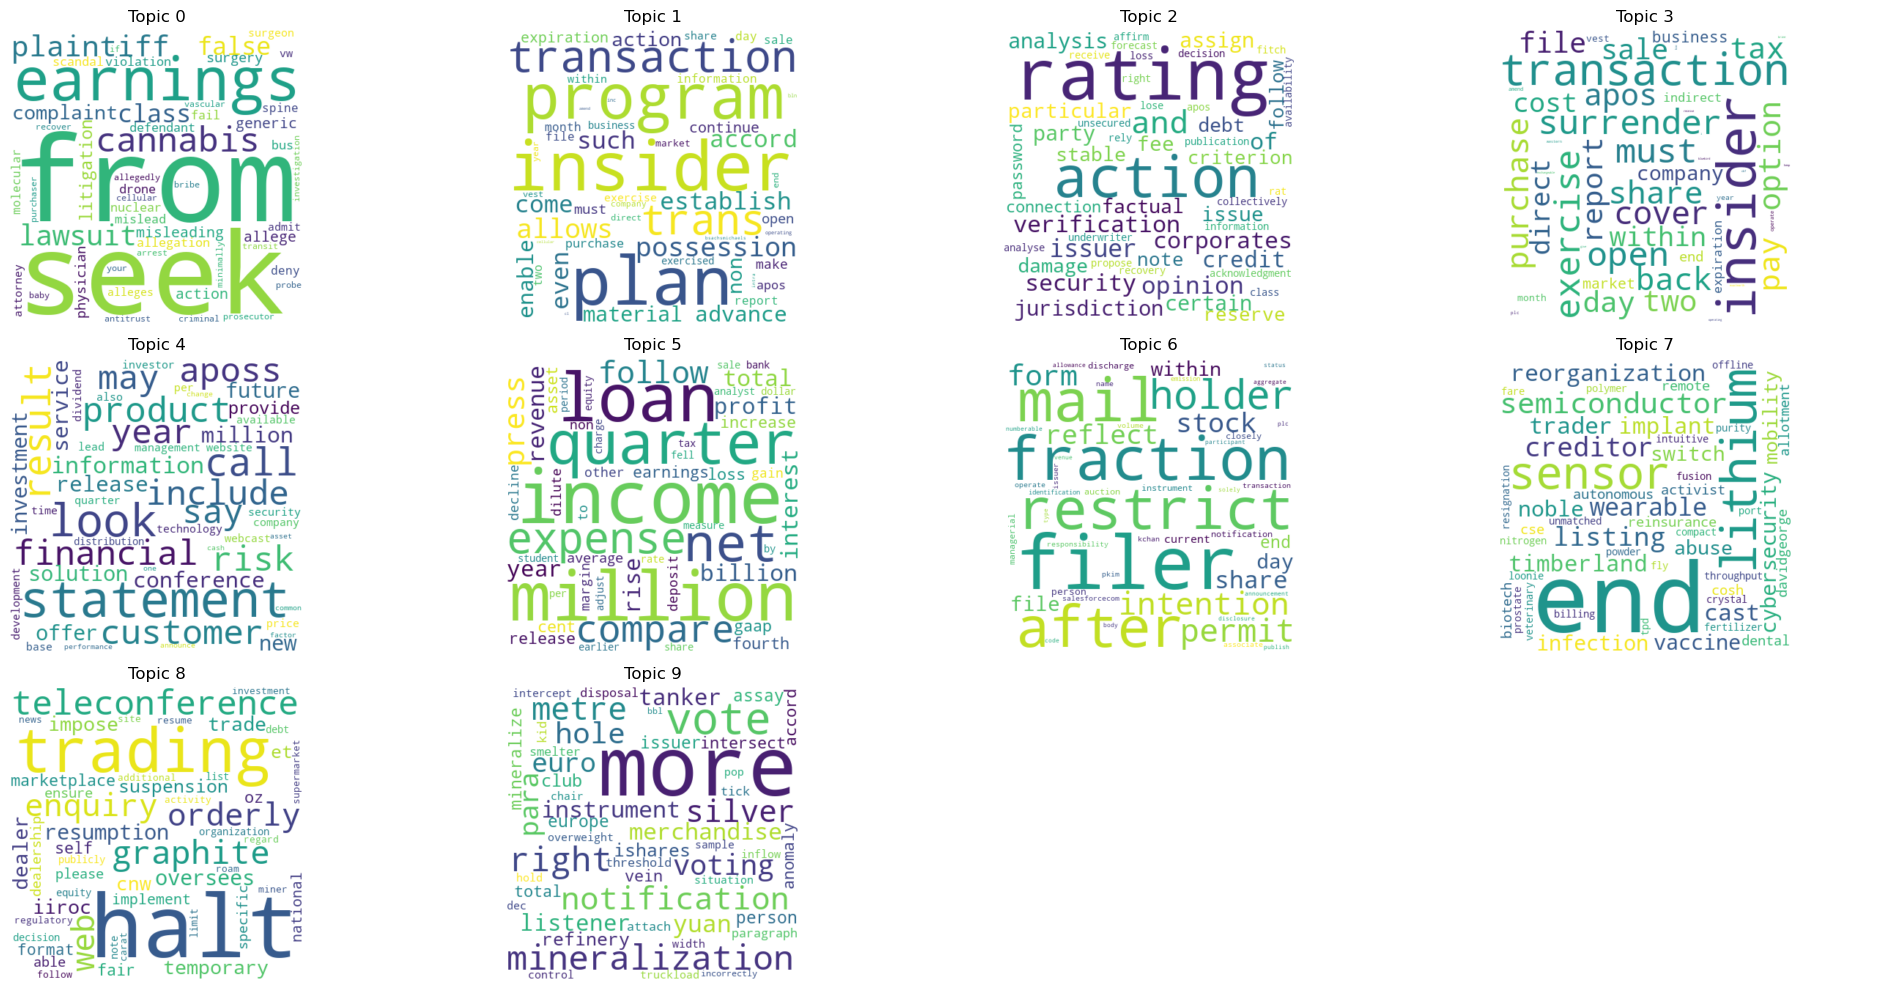

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# Calculate the number of rows and columns to neatly fit the subplots
num_topics = lda_model.num_topics
num_cols = math.ceil(math.sqrt(num_topics))
num_rows = math.ceil(num_topics / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Generate word clouds and plot
for i, ax in enumerate(axes_flat):
    if i < num_topics:
        # Generate word cloud for the i-th topic
        wc_dict = {word: weight for word, weight in lda_model.show_topic(i, topn=50)}
        wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(wc_dict)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Topic {i}')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


<ins>interpretation of each topic based on the words provided<ins>:
-
- Topic 0 (Legal and Litigation)
- Topic 1 (Corporate Strategy and Information)
- Topic 2 (Financial and Security Ratings)
- Topic 3 (Corporate Operations)
- Topic 4 (Corporate Communications)
- Topic 5 (Financial Performance)
- Topic 6 (Corporate Governance)
- Topic 7 (Technology and Innovation)
- Topic 8 (Trade and Regulation)
- Topic 9 (Resource and Asset Management)